In [2]:
import graphviz
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.api import qqplot, add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.tree import export_graphviz
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['font.family'] = 'NanumGothic'
matplotlib.rc('axes',unicode_minus=False)

In [3]:
df = pd.read_csv("C:/Users/82108/2 Big Data 분석/Car.csv", encoding='euc-kr')
df.head()

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Maruti Wagon R LXI CNG,Mumbai,2682.68,2010,72000,CNG,Manual,First,26.6 kmpl,998 CC,58.16 bhp,5.0,NaN
1,Hyundai Creta 1.6 CRDi SX Option,Pune,19162.00,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN
2,Honda Jazz V,Chennai,6898.32,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh
3,Maruti Ertiga VDI,Chennai,9197.76,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Price              6200 non-null   float64
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 736.8+ KB


In [5]:
df.isnull().sum()

Name                    0
Location                0
Price                1053
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
dtype: int64

In [6]:
df['Mileage'] = df['Mileage'].str.replace('kmpl','').astype('float64')
df['Engine'] = df['Engine'].str.replace('CC','').astype('float64')
df['Power'] = df['Power'].str.replace('bhp','')

In [7]:
df[df['Power']=='null '].head(5)

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
76,Ford Fiesta 1.4 SXi TDCi,Jaipur,3065.92,2008,111111,Diesel,Manual,First,17.8,1399.0,null,5.0,NaN
79,Hyundai Santro Xing XL,Hyderabad,1992.85,2005,87591,Petrol,Manual,First,0.0,1086.0,null,5.0,NaN
89,Hyundai Santro Xing XO,Hyderabad,3219.22,2007,73745,Petrol,Manual,First,17.0,1086.0,null,5.0,NaN
120,Hyundai Santro Xing XL eRLX Euro III,Mumbai,1303.02,2005,102000,Petrol,Manual,Second,17.0,1086.0,null,5.0,NaN
143,Hyundai Santro Xing XO eRLX Euro II,Kochi,2560.04,2008,80759,Petrol,Manual,Third,17.0,1086.0,null,5.0,NaN


In [8]:
df['Power'] = df['Power'].replace('null ',0).astype('float64')

#### Name자체는 unique한 값이기 때문에 brand만 파생변수로 만들고 변수 삭제를 하겠습니다

In [9]:
df['Brand'] = df['Name'].apply(lambda x:x.split()[0])

#### Name과 New_Price는 unique값이기 때문에 변수를 삭제해 보겠습니다

In [10]:
df = df.drop(['Name','New_Price'],axis=1)

In [11]:
df.head()

,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand
0,Mumbai,2682.68,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,Maruti
1,Pune,19162.00,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,Hyundai
2,Chennai,6898.32,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,Honda
3,Chennai,9197.76,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,Maruti
4,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,Audi


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           7253 non-null   object 
 1   Price              6200 non-null   float64
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   float64
 8   Engine             7207 non-null   float64
 9   Power              7207 non-null   float64
 10  Seats              7200 non-null   float64
 11  Brand              7253 non-null   object 
dtypes: float64(5), int64(2), object(5)
memory usage: 680.1+ KB


In [13]:
df['Location'].unique()

array(['Mumbai', 'Pune', 'Chennai', 'Coimbatore', 'Hyderabad', 'Jaipur',
       'Kochi', 'Kolkata', 'Delhi', 'Bangalore', 'Ahmedabad'],
      dtype=object)

In [14]:
df['Fuel_Type'].unique()

array(['CNG', 'Diesel', 'Petrol', 'LPG', 'Electric'], dtype=object)

In [15]:
df['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [16]:
df['Owner_Type'].unique()

array(['First', 'Second', 'Fourth & Above', 'Third'], dtype=object)

In [17]:
df['Brand'].unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'ISUZU', 'Force', 'Bentley', 'Lamborghini',
       'Hindustan', 'OpelCorsa'], dtype=object)

In [18]:
df = df.dropna(subset='Price')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6200 entries, 0 to 7236
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           6200 non-null   object 
 1   Price              6200 non-null   float64
 2   Year               6200 non-null   int64  
 3   Kilometers_Driven  6200 non-null   int64  
 4   Fuel_Type          6200 non-null   object 
 5   Transmission       6200 non-null   object 
 6   Owner_Type         6200 non-null   object 
 7   Mileage            6198 non-null   float64
 8   Engine             6164 non-null   float64
 9   Power              6164 non-null   float64
 10  Seats              6158 non-null   float64
 11  Brand              6200 non-null   object 
dtypes: float64(5), int64(2), object(5)
memory usage: 629.7+ KB


In [20]:
df.describe()

,Price,Year,Kilometers_Driven,Mileage,Engine,Power,Seats
count,6200.000000,6200.000000,6.200000e+03,6198.000000,6164.000000,6164.000000,6158.000000
mean,14912.514750,2013.434194,5.815738e+04,18.183448,1620.003731,111.346067,5.278500
std,17674.318464,3.271969,9.010627e+04,4.577602,601.493220,55.699437,0.808371
min,7.080000,1998.000000,1.710000e+02,0.000000,72.000000,0.000000,0.000000
25%,5365.360000,2012.000000,3.300000e+04,15.260000,1198.000000,74.000000,5.000000
50%,8814.520000,2014.000000,5.251450e+04,18.200000,1493.000000,92.350000,5.000000
75%,15869.972500,2016.000000,7.227750e+04,21.100000,1979.500000,138.100000,5.000000
max,245273.600000,2019.000000,6.500000e+06,33.540000,5998.000000,616.000000,10.000000


#### 제가 결측치를 제조사별 평균으로 채울 예정이라, 이상치를 먼저 지우고 결측치를 채우겠습니다

#### 평균은 이상치에 민감하기 때문에 이상치를 먼저 확인해 보겠습니다

#### 기술통계량을 보면 주행거리가 650만 km임을 볼 수 있습니다

#### 중고차가 50만 km이상이면 대부분 폐차한다고 알고있습니다

In [21]:
df[df['Kilometers_Driven'] >500000]

,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand
340,Kolkata,11497.20,2013,775000,Diesel,Automatic,First,19.30,1968.0,141.0,5.0,Skoda
358,Chennai,4138.99,2009,620000,Petrol,Manual,First,20.36,1197.0,78.9,5.0,Hyundai
1860,Chennai,9044.46,2013,720000,Diesel,Manual,First,20.54,1598.0,103.6,5.0,Volkswagen
2328,Chennai,99642.40,2017,6500000,Diesel,Automatic,First,15.97,2993.0,258.0,5.0,BMW


In [22]:
df = df[df['Kilometers_Driven']<500000] #이상치 제외

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6196 entries, 0 to 7236
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           6196 non-null   object 
 1   Price              6196 non-null   float64
 2   Year               6196 non-null   int64  
 3   Kilometers_Driven  6196 non-null   int64  
 4   Fuel_Type          6196 non-null   object 
 5   Transmission       6196 non-null   object 
 6   Owner_Type         6196 non-null   object 
 7   Mileage            6194 non-null   float64
 8   Engine             6160 non-null   float64
 9   Power              6160 non-null   float64
 10  Seats              6154 non-null   float64
 11  Brand              6196 non-null   object 
dtypes: float64(5), int64(2), object(5)
memory usage: 629.3+ KB


#### 또 연비가 0일 수가 없습니다

In [24]:
df[df['Mileage'] == 0]

,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand
14,Pune,26826.80,2012,85000,Diesel,Automatic,Second,0.0,2179.0,115.0,5.0,Land
67,Coimbatore,54680.68,2019,15369,Diesel,Automatic,First,0.0,1950.0,194.0,5.0,Mercedes-Benz
79,Hyderabad,1992.85,2005,87591,Petrol,Manual,First,0.0,1086.0,0.0,5.0,Hyundai
194,Ahmedabad,4522.23,2007,60006,Petrol,Manual,First,0.0,NaN,NaN,NaN,Honda
229,Bangalore,5518.66,2015,70436,Diesel,Manual,First,0.0,1498.0,99.0,NaN,Ford
...,...,...,...,...,...,...,...,...,...,...,...,...
5647,Mumbai,3372.51,2001,227000,Diesel,Manual,Fourth & Above,0.0,2446.0,0.0,8.0,Toyota
5875,Ahmedabad,53653.60,2019,4000,Diesel,Automatic,First,0.0,1950.0,194.0,5.0,Mercedes-Benz
5943,Chennai,2606.03,2002,75000,Diesel,Manual,First,0.0,2112.0,0.0,6.0,Mahindra
5972,Mumbai,2130.81,2008,65000,Petrol,Manual,Second,0.0,1086.0,62.0,5.0,Hyundai


In [25]:
df = df[df['Mileage']!=0] #이상치 제외

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6128 entries, 0 to 7236
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           6128 non-null   object 
 1   Price              6128 non-null   float64
 2   Year               6128 non-null   int64  
 3   Kilometers_Driven  6128 non-null   int64  
 4   Fuel_Type          6128 non-null   object 
 5   Transmission       6128 non-null   object 
 6   Owner_Type         6128 non-null   object 
 7   Mileage            6126 non-null   float64
 8   Engine             6103 non-null   float64
 9   Power              6103 non-null   float64
 10  Seats              6098 non-null   float64
 11  Brand              6128 non-null   object 
dtypes: float64(5), int64(2), object(5)
memory usage: 622.4+ KB


#### 또한 중고차 가격의 min이 7만원인 것을 볼 수 있습니다

#### 중고차 가격이 100만원 미만인 경우를 이상치로 보고 처리하겠습니다

In [27]:
df[df['Price']< 100] #이상치 제외

,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand
7236,Kochi,7.08,2018,23955,Petrol,Manual,First,18.6,1197.0,81.86,5.0,Hyundai


In [28]:
df = df[df['Price']> 100]

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6127 entries, 0 to 7235
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           6127 non-null   object 
 1   Price              6127 non-null   float64
 2   Year               6127 non-null   int64  
 3   Kilometers_Driven  6127 non-null   int64  
 4   Fuel_Type          6127 non-null   object 
 5   Transmission       6127 non-null   object 
 6   Owner_Type         6127 non-null   object 
 7   Mileage            6125 non-null   float64
 8   Engine             6102 non-null   float64
 9   Power              6102 non-null   float64
 10  Seats              6097 non-null   float64
 11  Brand              6127 non-null   object 
dtypes: float64(5), int64(2), object(5)
memory usage: 622.3+ KB


#### 또 좌석 수의 min값이 0인것을 볼 수 있습니다

#### 자동차의 좌석수가 0일수는 없습니다

#### 이도 처리하겠습니다

In [30]:
df[df['Seats'] == 0]

,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand
3999,Hyderabad,27593.28,2012,125000,Petrol,Automatic,First,10.5,3197.0,0.0,0.0,Audi


In [31]:
df = df[df['Seats'] != 0]

#### 이제 이상치는 모두 처리하였으니 결측치를 처리하겠습니다

In [32]:
df.isna().sum()

Location              0
Price                 0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               25
Power                25
Seats                30
Brand                 0
dtype: int64

In [33]:
df.head(10)

,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand
0,Mumbai,2682.68,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,Maruti
1,Pune,19162.00,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,Hyundai
2,Chennai,6898.32,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,Honda
3,Chennai,9197.76,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,Maruti
4,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,Audi
5,Hyderabad,3602.46,2012,75000,LPG,Manual,First,21.10,814.0,55.20,5.0,Hyundai
6,Jaipur,5365.36,2013,86999,Diesel,Manual,First,23.08,1461.0,63.10,5.0,Nissan
7,Mumbai,26826.80,2016,36000,Diesel,Automatic,First,11.36,2755.0,171.50,8.0,Toyota
8,Pune,7971.39,2013,64430,Diesel,Manual,First,20.54,1598.0,103.60,5.0,Volkswagen
9,Chennai,2989.27,2012,65932,Diesel,Manual,Second,22.30,1248.0,74.00,5.0,Tata


#### 이제 제조사별 평균으로 데이터들의 결측치를 채우겠습니다

In [34]:
df['Mileage'] = df['Mileage'].fillna(df.groupby(['Brand'])['Mileage'].transform('mean'))
df['Engine'] = df['Engine'].fillna(df.groupby(['Brand'])['Engine'].transform('mean'))
df['Power'] = df['Power'].fillna(df.groupby(['Brand'])['Power'].transform('mean'))
df['Seats'] = df['Seats'].fillna(df.groupby(['Brand'])['Seats'].transform('mean'))
df['Power'] = df['Power'].replace(0,df['Power'].mean())
df.head(10)

,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand
0,Mumbai,2682.68,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,Maruti
1,Pune,19162.00,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,Hyundai
2,Chennai,6898.32,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,Honda
3,Chennai,9197.76,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,Maruti
4,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,Audi
5,Hyderabad,3602.46,2012,75000,LPG,Manual,First,21.10,814.0,55.20,5.0,Hyundai
6,Jaipur,5365.36,2013,86999,Diesel,Manual,First,23.08,1461.0,63.10,5.0,Nissan
7,Mumbai,26826.80,2016,36000,Diesel,Automatic,First,11.36,2755.0,171.50,8.0,Toyota
8,Pune,7971.39,2013,64430,Diesel,Manual,First,20.54,1598.0,103.60,5.0,Volkswagen
9,Chennai,2989.27,2012,65932,Diesel,Manual,Second,22.30,1248.0,74.00,5.0,Tata


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6126 entries, 0 to 7235
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           6126 non-null   object 
 1   Price              6126 non-null   float64
 2   Year               6126 non-null   int64  
 3   Kilometers_Driven  6126 non-null   int64  
 4   Fuel_Type          6126 non-null   object 
 5   Transmission       6126 non-null   object 
 6   Owner_Type         6126 non-null   object 
 7   Mileage            6126 non-null   float64
 8   Engine             6126 non-null   float64
 9   Power              6126 non-null   float64
 10  Seats              6126 non-null   float64
 11  Brand              6126 non-null   object 
dtypes: float64(5), int64(2), object(5)
memory usage: 622.2+ KB


In [36]:
df.isnull().sum()

Location             0
Price                0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Brand                0
dtype: int64

## 시각화

#### 목표변수와 범주형 설명변수간의 분포를 확인

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


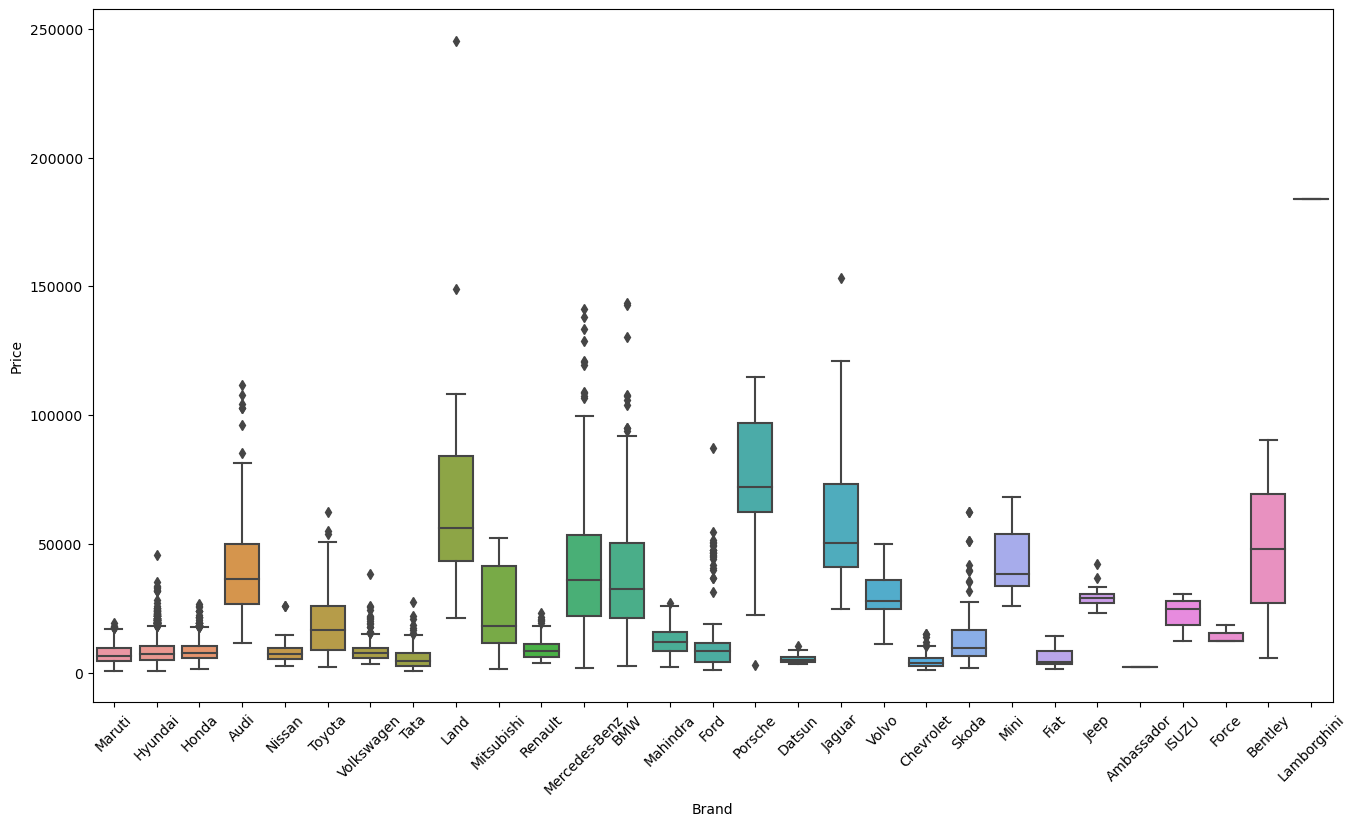

In [37]:
sns.boxplot(orient='v',y ="Price", x = "Brand" ,data = df)
plt.gcf().set_size_inches(16, 9)
plt.xticks(rotation=45);

#### 자동차 브랜드별로 가격대가 다른 것을 알 수 있다

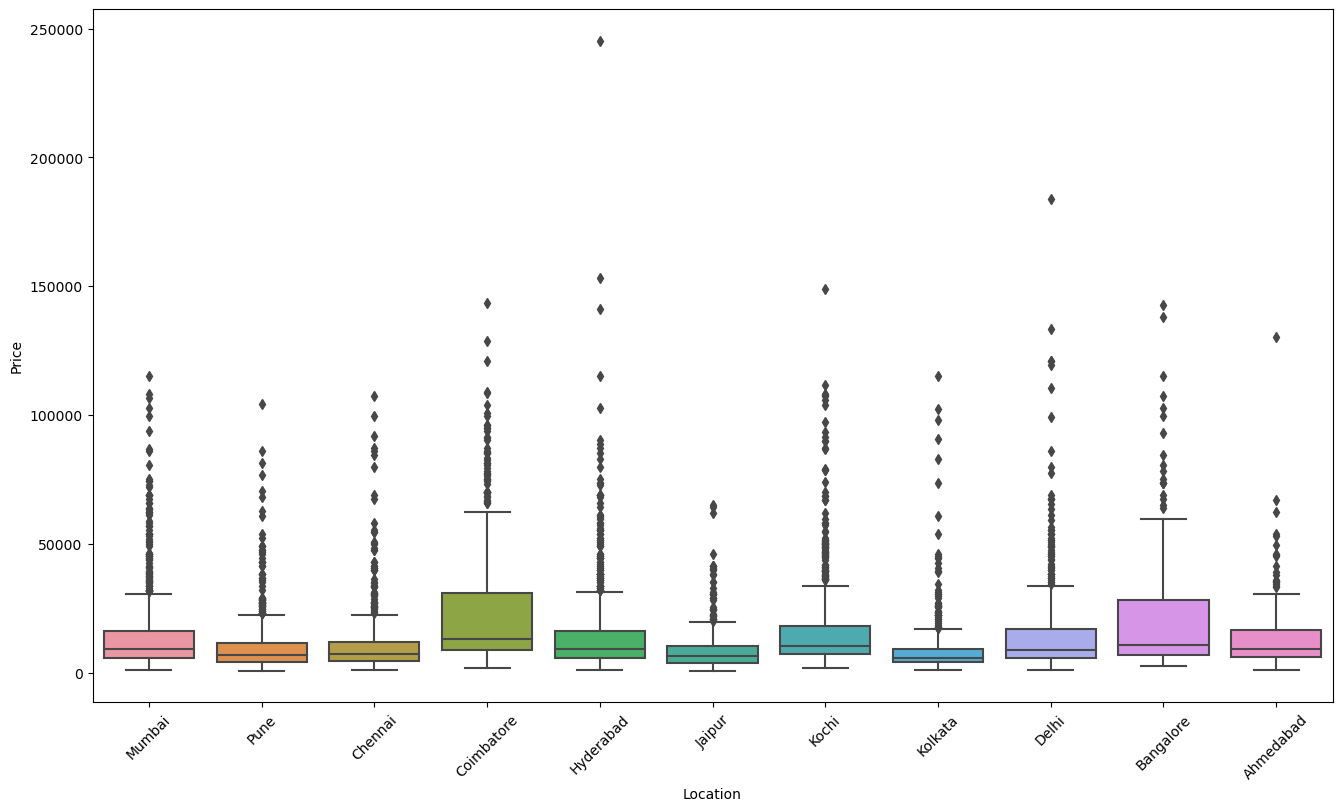

In [38]:
sns.boxplot(orient='v',y ="Price", x = "Location" ,data = df)
plt.gcf().set_size_inches(16, 9)
plt.xticks(rotation=45);

#### 지역간의 가격 차이는 거의 없는 것으로 보인다.

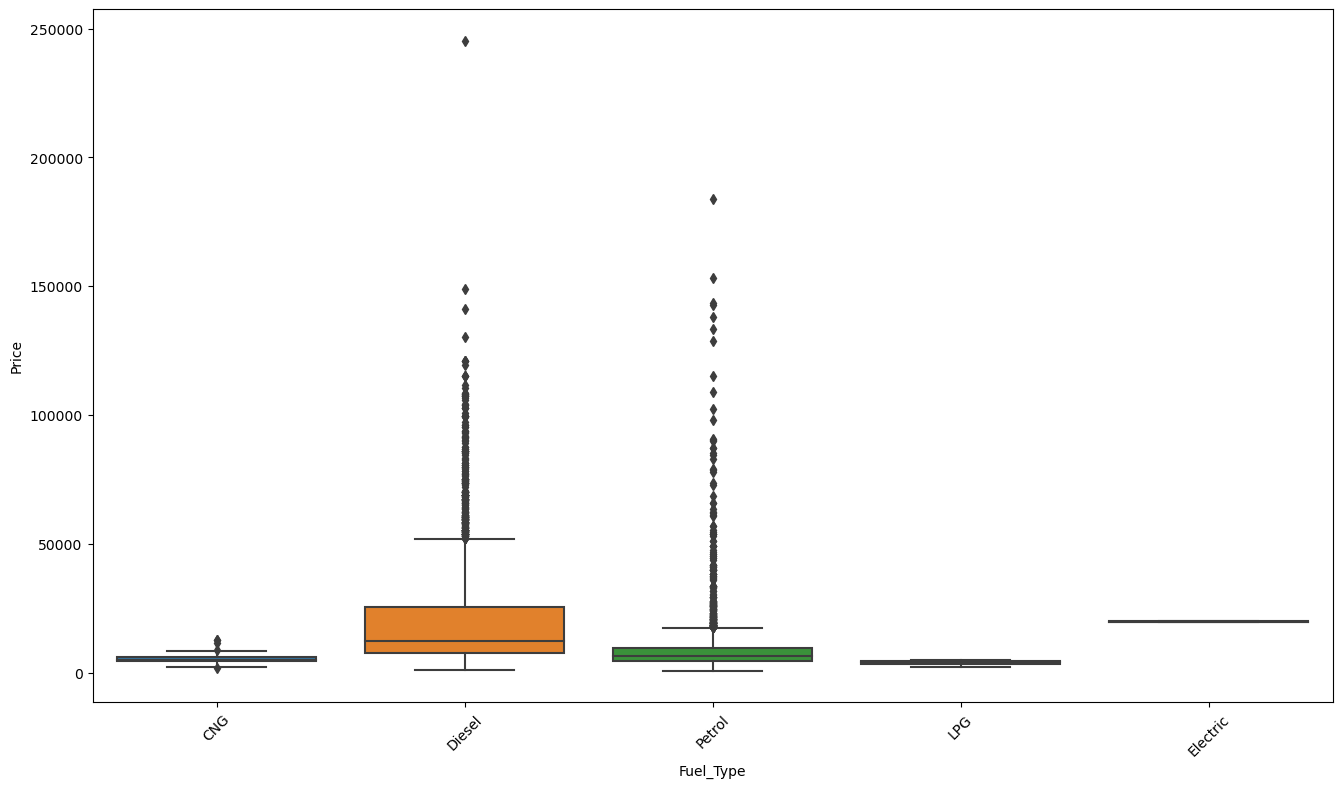

In [39]:
sns.boxplot(orient='v',y ="Price", x = "Fuel_Type" ,data = df)
plt.gcf().set_size_inches(16, 9)
plt.xticks(rotation=45);

#### 전기차>디젤>petrol>LPG>CNG순으로 가격대가 형성되어있다

<AxesSubplot:xlabel='Transmission', ylabel='Price'>

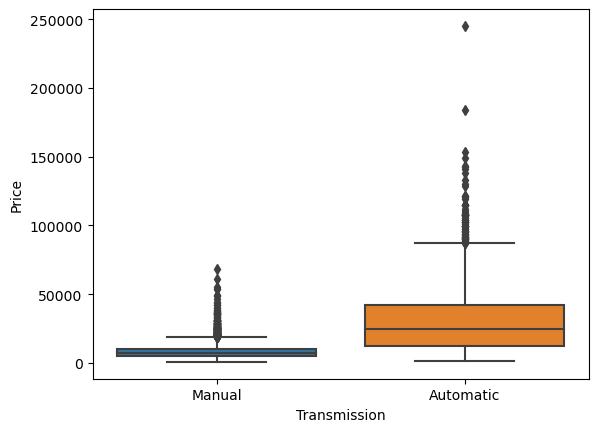

In [40]:
sns.boxplot(x = "Transmission", y = "Price",data = df)

#### 목표변수와 연속형 설명변수간 분포확인

In [41]:
cont_var_list_with_Price=['Price','Engine','Kilometers_Driven','Mileage','Power','Seats','Year']
cont_var_list=['Engine','Kilometers_Driven','Mileage','Power','Seats','Year']

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


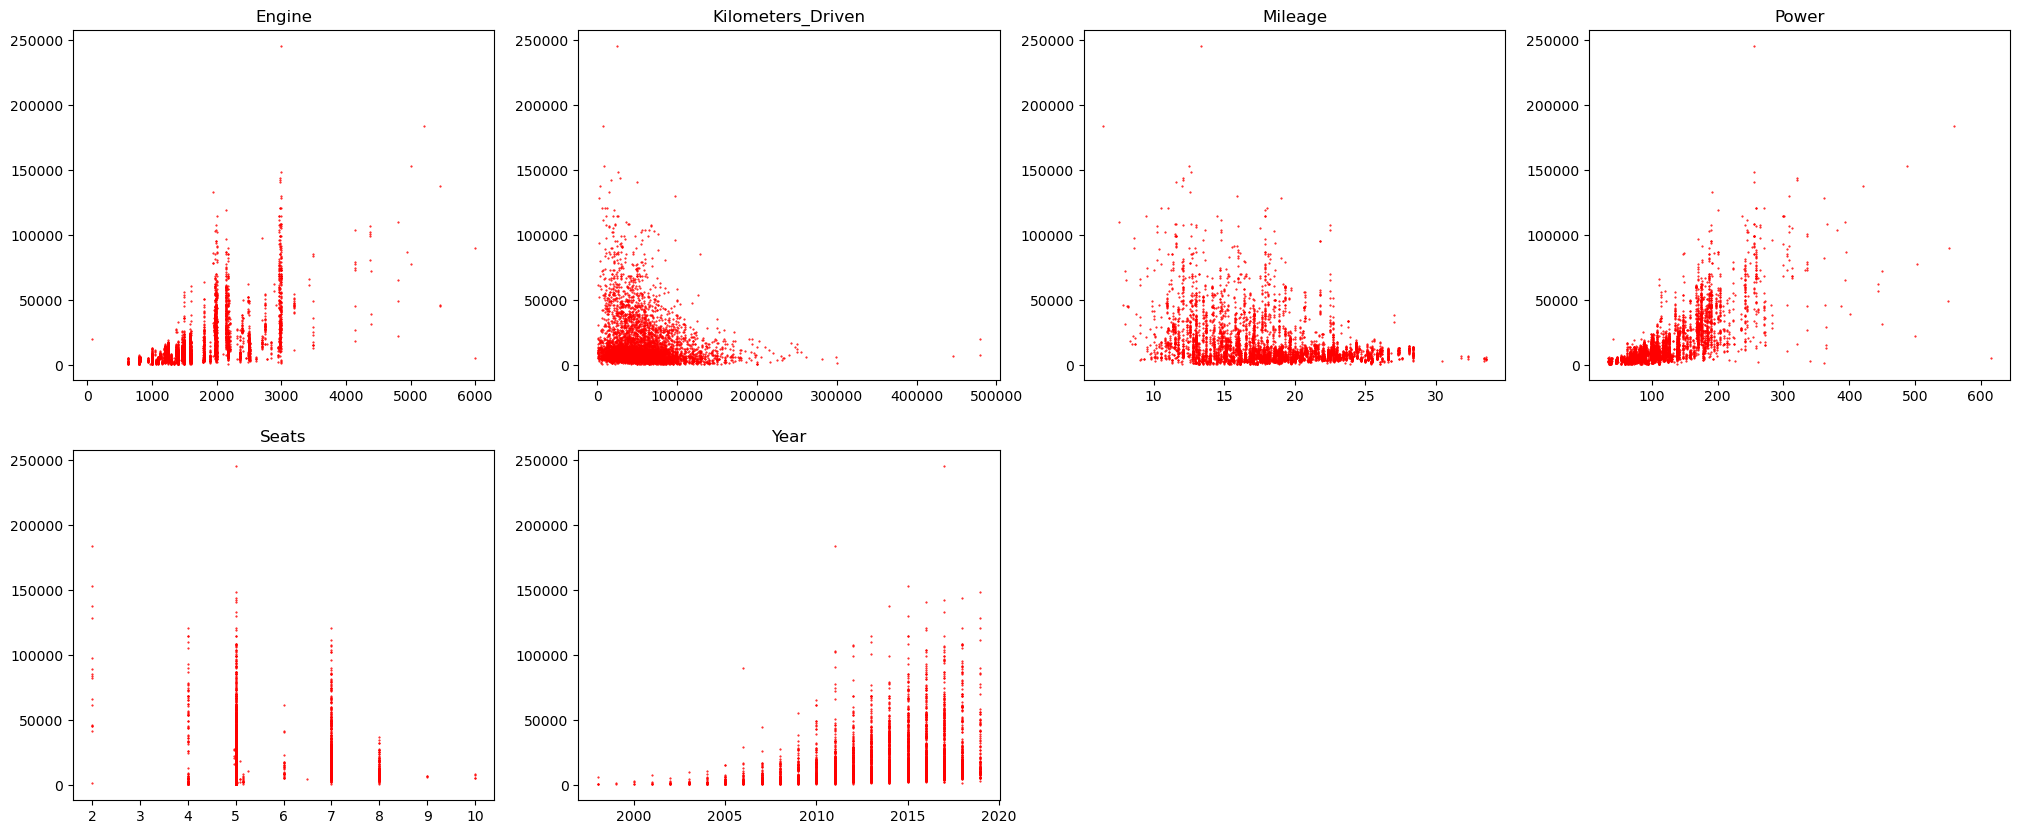

In [42]:
# 산점도그래프 그리기
plt.figure(figsize=(25,10)) # 종이 크기 지정

for i in range(len(cont_var_list)):
    plt.subplot(2,4,i+1)
    plt.scatter(df.loc[:,cont_var_list[i]], df['Price'], c='red',s=1,marker=".")
    plt.title(f'{cont_var_list[i]}')

In [43]:
df.dtypes

Location              object
Price                float64
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
Brand                 object
dtype: object

In [44]:
df_sample=df.loc[:,cont_var_list_with_Price].sample(n=500,random_state=1004)

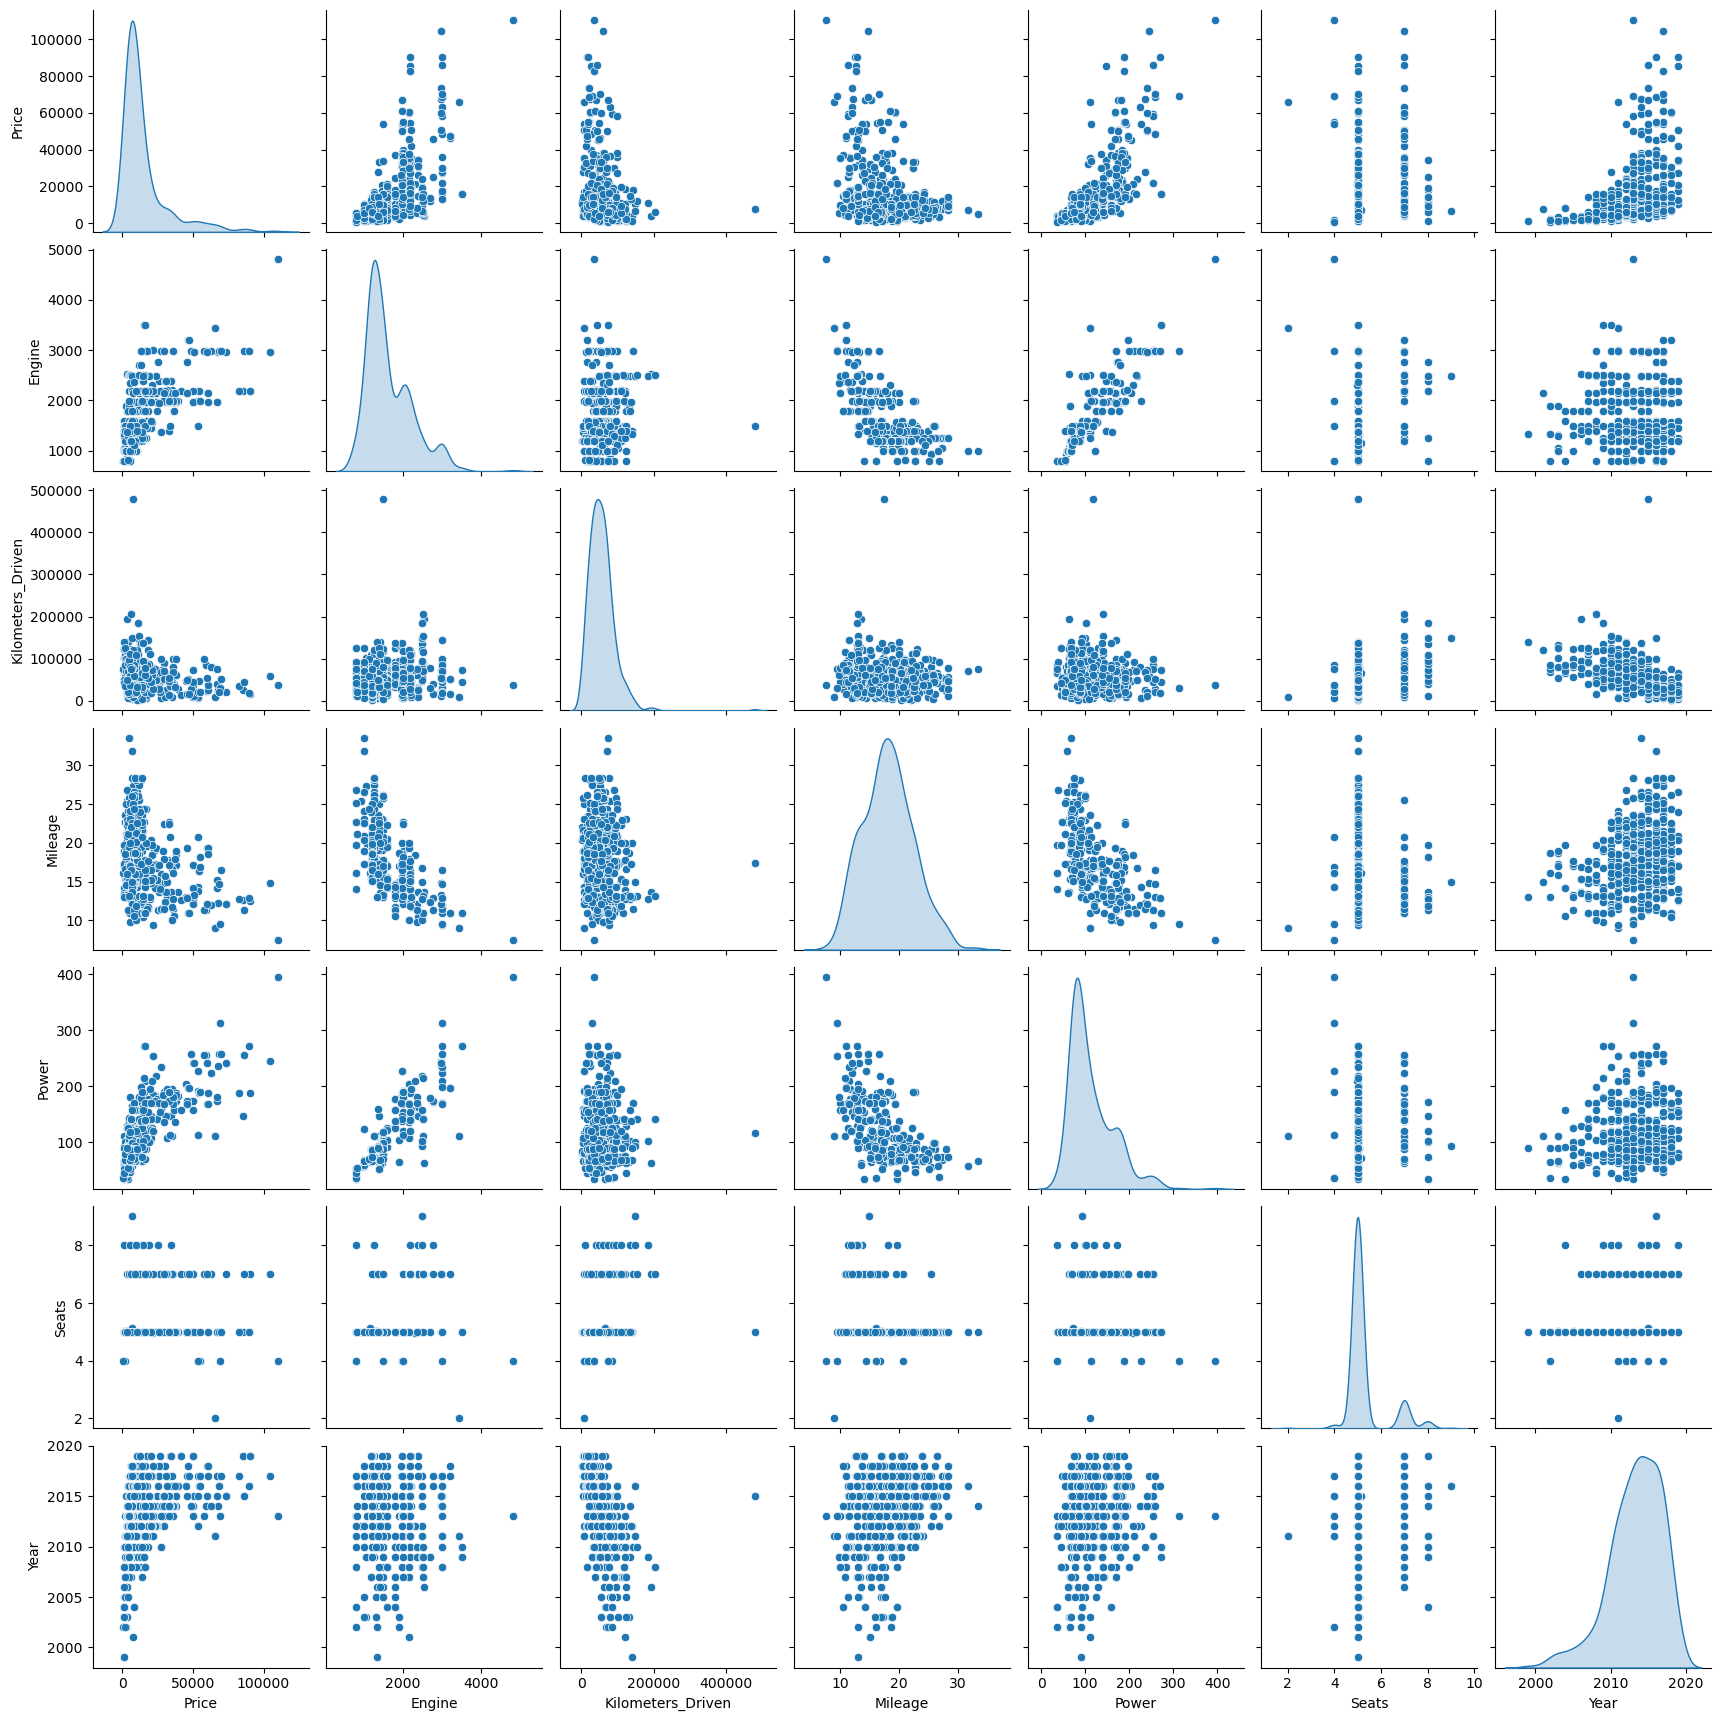

In [45]:
#산점도행렬
sns.pairplot(df_sample.loc[:,cont_var_list_with_Price], 
             diag_kind='kde',
             palette='deep') # pastel, bright, deep, muted, colorblind, dark

plt.show()

#### 현재 목표변수 Price는 설명변수 Engine, Power, year과 상관성이 있음을 알 수 있다

#### 또 Engine과 Power사이에도 상관성이 있음을 보인다

### 설명변수 항목과 목표변수간 차이 검정: Boxplot, t 검정, 카이제곱 검정, ANOVA

In [46]:
# 선형 회귀 분석: formula(y ~ X1 + X2 + ...) 이용, 상수항(intercept)은 자동 추가
reg_model=smf.ols(formula="Price ~ Seats + Power + Engine + Mileage + C(Owner_Type) + C(Transmission) + C(Fuel_Type) + Kilometers_Driven + Year + C(Location) + C(Brand)", data=df)
reg_result=reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     364.3
Date:                Sun, 05 Mar 2023   Prob (F-statistic):               0.00
Time:                        23:30:58   Log-Likelihood:                -64235.
No. Observations:                6126   AIC:                         1.286e+05
Df Residuals:                    6073   BIC:                         1.289e+05
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

#### 회귀분석을 통해 t통계량, F통계량을 모두 알 수 있습니다

#### 제조사별 중고차 가격 차이 검정 -> ANOVA 검정

In [47]:
# 선형 회귀 분석: formula(y ~ X1 + X2 + ...) 이용, 상수항(intercept)은 자동 추가
reg_model=smf.ols(formula="Price ~ C(Brand)", data=df)
reg_result=reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.579
Model:                            OLS   Adj. R-squared:                  0.577
Method:                 Least Squares   F-statistic:                     299.7
Date:                Sun, 05 Mar 2023   Prob (F-statistic):               0.00
Time:                        23:30:58   Log-Likelihood:                -65920.
No. Observations:                6126   AIC:                         1.319e+05
Df Residuals:                    6097   BIC:                         1.321e+05
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

#### 분석 결과 p값이 0보다 작으므로 회귀 모델로서 적합합니다

#### 설명력은 57.7%로, F통계량이 높아 설명력이 좋음을 알 수 있습니다

#### 하지만 Prob(Omnibus)와Prob(JB)를 보면 0.05이하로써 정규성이 없음을 판단할 수 있습니다

#### 따라서 선형회귀분석은 의미가 없다는 것을 알 수 있습니다

### 제조사별 중고차 비율 차이 검정 -> Chi 검정

In [48]:
contigency= pd.crosstab(df['Brand'],df['Brand'])
contigency

Brand,Ambassador,Audi,BMW,Bentley,Chevrolet,Datsun,Fiat,Force,Ford,Honda,...,Mini,Mitsubishi,Nissan,Porsche,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo
Brand,,,,,,,,,,,,,,,,,,,,,
Ambassador,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Audi,0,239,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BMW,0,0,272,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bentley,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Chevrolet,0,0,0,0,121,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Datsun,0,0,0,0,0,17,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Fiat,0,0,0,0,0,0,30,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Force,0,0,0,0,0,0,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0
Ford,0,0,0,0,0,0,0,0,303,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
# chi-square test 실행
chi, pval, dof, expected = stats.chi2_contingency(contigency)

# chi-square test 결과 출력
print("chi-square test")
print("chisq: {0:0.3f}".format(chi))
print("p: {0:0.3f}".format(pval))
print("degree pf freedom:{}".format(dof))
print("expected value: \n{}".format(expected.round(3)))

chi-square test
chisq: 171528.000
p: 0.000
degree pf freedom:784
expected value: 
[[0.00000e+00 3.90000e-02 4.40000e-02 0.00000e+00 2.00000e-02 3.00000e-03
  5.00000e-03 0.00000e+00 4.90000e-02 1.01000e-01 1.79000e-01 0.00000e+00
  7.00000e-03 3.00000e-03 0.00000e+00 8.00000e-03 4.60000e-02 2.05000e-01
  5.10000e-02 5.00000e-03 6.00000e-03 1.60000e-02 3.00000e-03 2.50000e-02
  2.90000e-02 3.20000e-02 6.90000e-02 5.20000e-02 3.00000e-03]
 [3.90000e-02 9.32400e+00 1.06120e+01 7.80000e-02 4.72100e+00 6.63000e-01
  1.17000e+00 1.17000e-01 1.18210e+01 2.41500e+01 4.26810e+01 1.17000e-01
  1.67800e+00 7.41000e-01 3.90000e-02 1.99000e+00 1.09240e+01 4.88850e+01
  1.22110e+01 1.13100e+00 1.32600e+00 3.70600e+00 7.02000e-01 5.89100e+00
  6.98400e+00 7.60800e+00 1.64250e+01 1.24450e+01 8.19000e-01]
 [4.40000e-02 1.06120e+01 1.20770e+01 8.90000e-02 5.37300e+00 7.55000e-01
  1.33200e+00 1.33000e-01 1.34530e+01 2.74840e+01 4.85750e+01 1.33000e-01
  1.90900e+00 8.44000e-01 4.40000e-02 2.26400e+00 1.

####  p값이 0.05보다 작으므로, 각 '제조사별로 차량의 갯수 다르다 '라는 가설이 설명력이 있음을 알 수 있습니다

### 상관분석

In [50]:
corr_matrix=df.corr()
print(corr_matrix)

                      Price      Year  Kilometers_Driven   Mileage    Engine  \
Price              1.000000  0.300244          -0.175029 -0.326046  0.639195   
Year               0.300244  1.000000          -0.485021  0.297952 -0.060870   
Kilometers_Driven -0.175029 -0.485021           1.000000 -0.157242  0.171118   
Mileage           -0.326046  0.297952          -0.157242  1.000000 -0.643434   
Engine             0.639195 -0.060870           0.171118 -0.643434  1.000000   
Power              0.753298  0.010715           0.005450 -0.547493  0.861524   
Seats              0.056134  0.013320           0.230766 -0.349343  0.399712   

                      Power     Seats  
Price              0.753298  0.056134  
Year               0.010715  0.013320  
Kilometers_Driven  0.005450  0.230766  
Mileage           -0.547493 -0.349343  
Engine             0.861524  0.399712  
Power              1.000000  0.099630  
Seats              0.099630  1.000000  


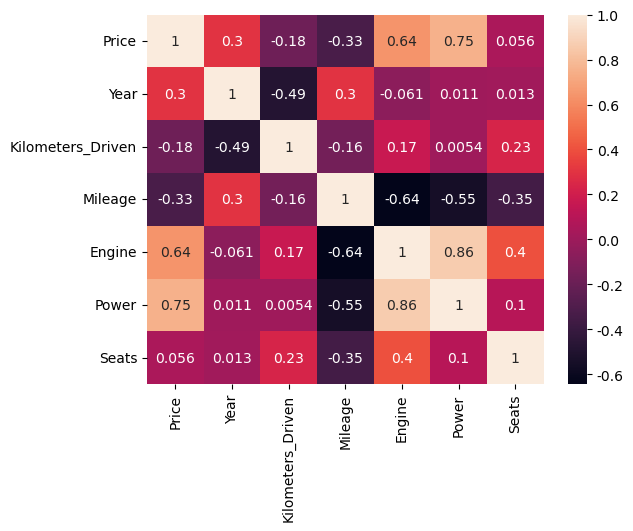

In [51]:
sns.heatmap(corr_matrix,annot=True);

#### Price는 Engine과 Power와 강한 양의 상관성을 가집니다

#### 즉, 엔진의 배기량과 최대출력이 좋을수록 가격이 높아가는 것을 알 수 있습니다

#### 또한 Mileage는 Engine과 Power와 음의 상관성을 가집니다

#### 즉 엔진의 배기량과 최대출력이 낮을수록 연비가 좋아지는 것을 알 수 있습니다

#### 또한 Power와 Engine은 강한 양의 상관성을 가지고 있습니다

#### 즉, 엔진의 배기량이 클수록 최대출력이 좋음을 알 수 있습니다

## 모델링 및 평가

### 1. 다중선형회귀

#### 위에서 회귀분석을 했을 때, 정규성이 없다고 판단하여 선형회귀가 유의미하지 않다고 생각했으나, 변수 선택을 하기위해 다중선형회귀를 진행하겠습니다(모델링을 따로 하는것이 아니기 때문에 train/test를 따로 나누지 않고 진행했습니다)

In [52]:
df_train, df_test = train_test_split(df,test_size=0.3,random_state=1234)
print('train data size:{}'.format(df_train.shape))
print('test data size:{}'.format(df_test.shape))

train data size:(4288, 12)
test data size:(1838, 12)


In [53]:
reg_model = smf.ols(formula="Price ~ Power + Engine + Kilometers_Driven + Year ",data=df)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     2917.
Date:                Sun, 05 Mar 2023   Prob (F-statistic):               0.00
Time:                        23:30:59   Log-Likelihood:                -65303.
No. Observations:                6126   AIC:                         1.306e+05
Df Residuals:                    6121   BIC:                         1.306e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -2.949e+06   9.43e+0

#### 다중회귀분석을 통해 선택된 변수는 Power,Engine,Kilometers_Driven,Year 입니다

#### 이제 유의한 인자 중 공통으로 선정된 인자를 토대로 모델링을 재실시합니다

In [54]:
#RMSE
def root_mean_squared_error(y_true,y_pred):
    return np.sqrt(mean_squared_error(y_true,y_pred))
#MAPE
def mean_absolute_percentage_error(y_true,y_pred):
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

In [55]:
df_train, df_test= train_test_split(df, test_size = 0.3, shuffle=True, random_state = 1234)

In [56]:
df_train_x = df_train.drop('Price',axis=1)
df_train_x=df_train_x.loc[:,['Power','Engine','Kilometers_Driven','Year']]
df_train_y = df_train.Price
df_test_x = df_test.drop('Price',axis=1)
df_test_x=df_test_x.loc[:,['Power','Engine','Kilometers_Driven','Year']]
df_test_y = df_test.Price

In [57]:
df_train_x.dtypes

Power                float64
Engine               float64
Kilometers_Driven      int64
Year                   int64
dtype: object

In [58]:
estimator=DecisionTreeRegressor()
# 구하고자 하는 parameter와 범위
param_grid = [
        {'min_samples_leaf': [i*10 for i in range(1,10)], 'min_samples_split': [i*10 for i in range(1,10)]},
        {'max_depth': [i*2 for i in range(1,4)]},
]
# 정확도가 높은 최적 parameter 찾기
grid_search = GridSearchCV(estimator, param_grid, cv=5,
                           scoring='r2',
                           return_train_score=True)
grid_search.fit(df_train_x,df_train_y)
print('best estimator model: \n{}'.format(grid_search.best_estimator_))
print('\nbest parameter: \n{}'.format(grid_search.best_params_))
print('\nbest score:\n{}'.format(grid_search.best_score_.round(3)))

best estimator model: 
DecisionTreeRegressor(min_samples_leaf=10, min_samples_split=20)

best parameter: 
{'min_samples_leaf': 10, 'min_samples_split': 20}

best score:
0.781


In [59]:
estimator=RandomForestRegressor()
# 구하고자 하는 parameter와 범위
param_grid = [
        {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
        {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]
# 정확도가 높은 최적 parameter 찾기
grid_search = GridSearchCV(estimator, param_grid, cv=5,
                           scoring='r2',
                           return_train_score=True)
grid_search.fit(df_train_x,df_train_y)
print('best estimator model: \n{}'.format(grid_search.best_estimator_))
print('\nbest parameter: \n{}'.format(grid_search.best_params_))
print('\nbest score:\n{}'.format(grid_search.best_score_.round(3)))

best estimator model: 
RandomForestRegressor(max_features=2, n_estimators=30)

best parameter: 
{'max_features': 2, 'n_estimators': 30}

best score:
0.803


In [60]:
estimator=GradientBoostingRegressor()
# 구하고자 하는 parameter와 범위
param_grid = [
        {'random_state': [1234], 'n_estimators': [10,20]},
        {'min_samples_leaf': [10,20,30,40], 'max_depth': [10,20,30], 'learning_rate': [0.1,0.11,0.12,0.13]}
]
# 정확도가 높은 최적 parameter 찾기
grid_search = GridSearchCV(estimator, param_grid, cv=5,
                           scoring='r2',
                           return_train_score=True)
grid_search.fit(df_train_x,df_train_y)
print('best estimator model: \n{}'.format(grid_search.best_estimator_))
print('\nbest parameter: \n{}'.format(grid_search.best_params_))
print('\nbest score:\n{}'.format(grid_search.best_score_.round(3)))

best estimator model: 
GradientBoostingRegressor(learning_rate=0.12, max_depth=10, min_samples_leaf=20)

best parameter: 
{'learning_rate': 0.12, 'max_depth': 10, 'min_samples_leaf': 20}

best score:
0.82


In [61]:
#회귀모델 
lr_model=smf.ols(formula = "Price ~ Power+ Engine + Kilometers_Driven + Year",data = df_train)
lr_result = lr_model.fit()
print(lr_result.summary())

#Decision Tree
dt_model = DecisionTreeRegressor(random_state=1234,min_samples_leaf = 10, min_samples_split=10)
dt_model.fit(df_train_x, df_train_y)

#Random Forest
rf_model = RandomForestRegressor(random_state=1234, n_estimators=30)
rf_model.fit(df_train_x,df_train_y)

#Gradient Boosting 
gb_model = GradientBoostingRegressor(random_state=1234, min_samples_leaf=20, max_depth = 10, learning_rate=0.12)
gb_model.fit(df_train_x,df_train_y)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     1926.
Date:                Sun, 05 Mar 2023   Prob (F-statistic):               0.00
Time:                        23:34:24   Log-Likelihood:                -45851.
No. Observations:                4288   AIC:                         9.171e+04
Df Residuals:                    4283   BIC:                         9.174e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -3.026e+06   1.17e+0

GradientBoostingRegressor(learning_rate=0.12, max_depth=10, min_samples_leaf=20,
                          random_state=1234)

In [62]:
#의사결정나무 변수중요도

v_feature_name = df_train_x.columns

df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = dt_model.feature_importances_

df_importance.sort_values('Importance',ascending=False,inplace=True)
df_importance.round(3)

,Feature,Importance
0,Power,0.757
3,Year,0.192
2,Kilometers_Driven,0.029
1,Engine,0.022


Text(0, 0.5, 'variable importance')

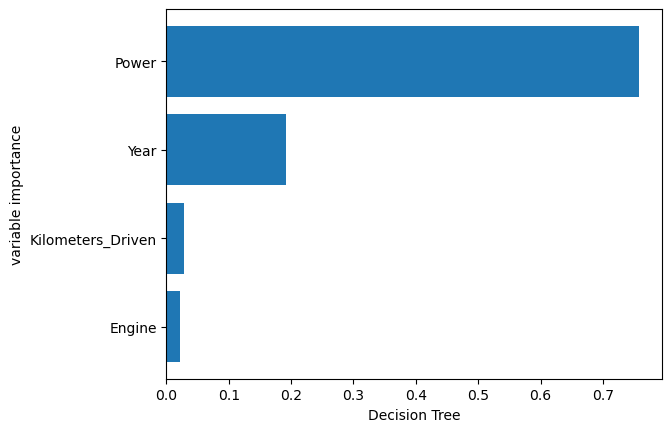

In [63]:
df_importance.sort_values('Importance',ascending=True,inplace=True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width=df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('Decision Tree')
plt.ylabel('variable importance')

In [64]:
#랜덤포레스트 변수중요도

v_feature_name = df_train_x.columns

df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = rf_model.feature_importances_

df_importance.sort_values('Importance',ascending=False,inplace=True)
df_importance.round(3)

,Feature,Importance
0,Power,0.684
3,Year,0.180
2,Kilometers_Driven,0.083
1,Engine,0.053


Text(0, 0.5, 'variable importance')

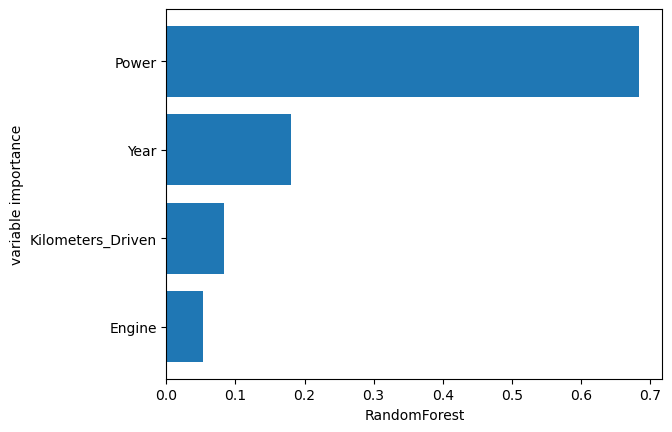

In [65]:
df_importance.sort_values('Importance',ascending=True,inplace=True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width=df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('RandomForest')
plt.ylabel('variable importance')

In [66]:
#그래디언트부스팅 변수중요도

v_feature_name = df_train_x.columns

df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = gb_model.feature_importances_

df_importance.sort_values('Importance',ascending=False,inplace=True)
df_importance.round(3)

,Feature,Importance
0,Power,0.733
3,Year,0.179
1,Engine,0.046
2,Kilometers_Driven,0.041


Text(0, 0.5, 'variable importance')

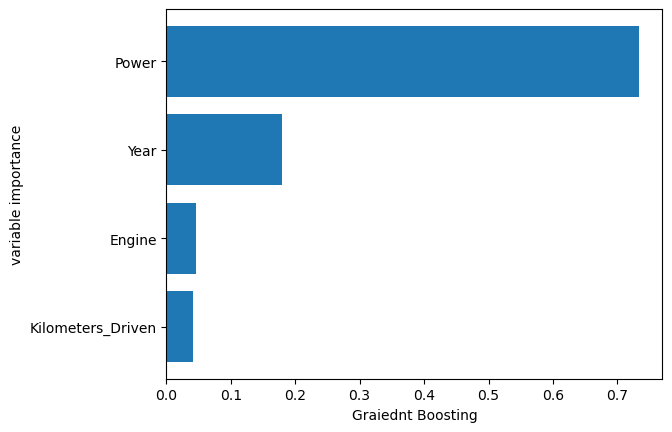

In [67]:
df_importance.sort_values('Importance',ascending=True,inplace=True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width=df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('Graiednt Boosting')
plt.ylabel('variable importance')

In [68]:
models = ["회귀분석","의사결정나무","랜덤 포레스트","그래디언트 부스팅"]
#평가 리스트 초기화 
mse,rmse,mae,mape = [],[],[],[]

In [69]:
#회귀분석 - 예측 
lr_y_pred = lr_result.predict(df_test)

#평가 
mse.append(mean_squared_error(df_test['Price'],lr_y_pred))
rmse.append(root_mean_squared_error(df_test['Price'],lr_y_pred))
mae.append(mean_absolute_error(df_test['Price'],lr_y_pred))
mape.append(mean_absolute_percentage_error(df_test['Price'],lr_y_pred))

In [70]:
#예측
dt_y_pred= dt_model.predict(df_test_x)

#평가
mse.append(mean_squared_error(df_test_y,dt_y_pred))
rmse.append(root_mean_squared_error(df_test_y,dt_y_pred))
mae.append(mean_absolute_error(df_test_y,dt_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y,dt_y_pred))

In [71]:
#랜덤포레스트
#예측 
rf_y_pred = rf_model.predict(df_test_x)

#평가
mse.append(mean_squared_error(df_test_y,rf_y_pred))
rmse.append(root_mean_squared_error(df_test_y,rf_y_pred))
mae.append(mean_absolute_error(df_test_y,rf_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y,rf_y_pred))

In [72]:
#예측 
gb_y_pred = gb_model.predict(df_test_x)

#평가
mse.append(mean_squared_error(df_test_y,gb_y_pred))
rmse.append(root_mean_squared_error(df_test_y,gb_y_pred))
mae.append(mean_absolute_error(df_test_y,gb_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y,gb_y_pred))

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


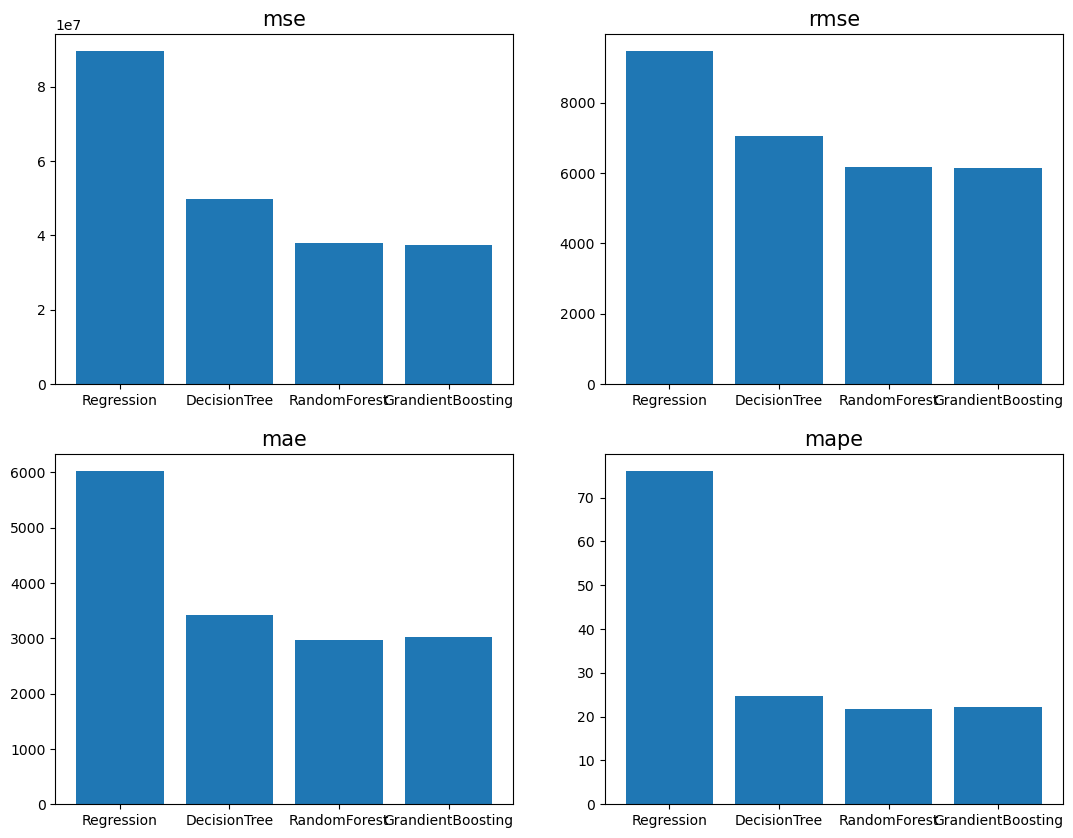

In [73]:
#평가 
models = ['Regression','DecisionTree',"RandomForest","GrandientBoosting"]

fig, ax = plt.subplots(2,2,figsize = (13,10))
ax[0,0].bar(models,mse)
ax[0,0].set_title("mse").set_fontsize(15)

ax[0,1].bar(models,rmse)
ax[0,1].set_title("rmse").set_fontsize(15)

ax[1,0].bar(models,mae)
ax[1,0].set_title("mae").set_fontsize(15)

ax[1,1].bar(models,mape)
ax[1,1].set_title("mape").set_fontsize(15)

In [74]:
train_pred = lr_result.predict(df_train_x)
test_pred = lr_result.predict(df_test_x)
print('train data의 결정계수: ', r2_score(df_train_y, train_pred))
print('test data의 결정계수: ', r2_score(df_test_y, test_pred))

train data의 결정계수:  0.642646946438461
test data의 결정계수:  0.6896310491360245


In [75]:
train_pred = dt_model.predict(df_train_x)
test_pred = dt_model.predict(df_test_x)
print('train data의 결정계수: ', r2_score(df_train_y, train_pred))
print('test data의 결정계수: ', r2_score(df_test_y, test_pred))

train data의 결정계수:  0.8598348962222535
test data의 결정계수:  0.8274908075262155


In [76]:
train_pred = rf_model.predict(df_train_x)
test_pred = rf_model.predict(df_test_x)
print('train data의 결정계수: ', r2_score(df_train_y, train_pred))
print('test data의 결정계수: ', r2_score(df_test_y, test_pred))

train data의 결정계수:  0.9697558788766898
test data의 결정계수:  0.8683034564872132


In [77]:
train_pred = gb_model.predict(df_train_x)
test_pred = gb_model.predict(df_test_x)
print('train data의 결정계수: ', r2_score(df_train_y, train_pred))
print('test data의 결정계수: ', r2_score(df_test_y, test_pred))

train data의 결정계수:  0.9174062620020522
test data의 결정계수:  0.8699381427025464


In [78]:
models=['Regression','DecisionTree','RamdomForest','GradientBoosting']
r2_df= pd.DataFrame(np.array([[0.642,0.859,0.969,0.917],[0.689,0.827,0.868,0.869]]),columns=models)
                    
r2_df.index = ['train','test']
r2_df

,Regression,DecisionTree,RamdomForest,GradientBoosting
train,0.642,0.859,0.969,0.917
test,0.689,0.827,0.868,0.869
